In [11]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Set global float formatting
pd.options.display.float_format = '{:,.2f}'.format

In [12]:
# Load the source data file and read and display it with Pandas

movie_data = Path("English_Movies_Data.csv")
movie_data_df = pd.read_csv(movie_data)
movie_data_df

,Name,Date,Score,Genre,Language,Budget,Revenue,Profit,History,Animation,...,Music,Romance,Fantasy,Thriller,Action,War,Mystery,Western,Drama,TV Movie
0,The Passion of the Christ,2004-02-25,74.00,Drama,English,"25,000,000.00","622,313,635.00","597,313,635.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,John Wick: Chapter 2,2017-05-18,73.00,"Action,Thriller,Crime",English,"40,000,000.00","171,539,887.00","131,539,887.00",0.00,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
2,John Wick: Chapter 3 - Parabellum,2019-05-16,74.00,"Action,Thriller,Crime",English,"55,000,000.00","326,709,727.00","271,709,727.00",0.00,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
3,A Bronx Tale,1994-05-20,78.00,"Drama,Crime",English,"10,000,000.00","17,287,898.00","7,287,898.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,Avatar,2009-12-17,76.00,"Action,Adventure,Fantasy,Science Fiction",English,"237,000,000.00","2,923,706,026.00","2,686,706,026.00",0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,The Love Guru,2008-07-10,42.00,"Comedy,Romance",English,"62,000,000.00","40,159,017.00","-21,840,983.00",0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4771,20th Century Women,2016-12-28,73.00,Drama,English,"7,000,000.00","9,353,729.00","2,353,729.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4772,Delta Force 2: The Colombian Connection,1990-08-24,54.00,Action,English,"9,145,817.80","6,698,361.00","-2,447,456.80",0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4773,The Russia House,1990-12-21,61.00,"Drama,Thriller,Romance",English,"21,800,000.00","22,997,992.00","1,197,992.00",0.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [13]:
#Create copies of the data frame for each category we want to sum up
revenue_copy = movie_data_df.copy()
profit_copy = movie_data_df.copy()
score_copy = movie_data_df.copy()

In [14]:
#Retrieve the column headers to build the list of genres

column_headers = revenue_copy.columns

print(column_headers)

Index(['Name', 'Date', 'Score', 'Genre', 'Language', 'Budget', 'Revenue',
       'Profit', 'History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie'],
      dtype='object')


In [15]:
revenue_data = revenue_copy[['Revenue',
       'History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']]

revenue_data

,Revenue,History,Animation,Horror,Crime,Documentary,Comedy,Adventure,Family,Science Fiction,Music,Romance,Fantasy,Thriller,Action,War,Mystery,Western,Drama,TV Movie
0,"622,313,635.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,"171,539,887.00",0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
2,"326,709,727.00",0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
3,"17,287,898.00",0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,"2,923,706,026.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,"40,159,017.00",0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4771,"9,353,729.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4772,"6,698,361.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4773,"22,997,992.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [16]:
# Define the columns to search for the value 1
columns_to_search = ['History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']

# Specify the column from which to replace the value
replacement_column = 'Revenue'

# Iterate over the rows and columns to find and replace the value
for index, row in revenue_data.iterrows():
    for col in columns_to_search:
        if row[col] == 1:
            revenue_data.at[index, col] = row[replacement_column]
            
revenue_data            

,Revenue,History,Animation,Horror,Crime,Documentary,Comedy,Adventure,Family,Science Fiction,Music,Romance,Fantasy,Thriller,Action,War,Mystery,Western,Drama,TV Movie
0,"622,313,635.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"622,313,635.00",0.00
1,"171,539,887.00",0.00,0.00,0.00,"171,539,887.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"171,539,887.00","171,539,887.00",0.00,0.00,0.00,0.00,0.00
2,"326,709,727.00",0.00,0.00,0.00,"326,709,727.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"326,709,727.00","326,709,727.00",0.00,0.00,0.00,0.00,0.00
3,"17,287,898.00",0.00,0.00,0.00,"17,287,898.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"17,287,898.00",0.00
4,"2,923,706,026.00",0.00,0.00,0.00,0.00,0.00,0.00,"2,923,706,026.00",0.00,"2,923,706,026.00",0.00,0.00,"2,923,706,026.00",0.00,"2,923,706,026.00",0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,"40,159,017.00",0.00,0.00,0.00,0.00,0.00,"40,159,017.00",0.00,0.00,0.00,0.00,"40,159,017.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4771,"9,353,729.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"9,353,729.00",0.00
4772,"6,698,361.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"6,698,361.00",0.00,0.00,0.00,0.00,0.00
4773,"22,997,992.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"22,997,992.00",0.00,"22,997,992.00",0.00,0.00,0.00,0.00,"22,997,992.00",0.00


In [17]:
# Define an empty list to hold the sums
sums = []

# Calculate the sum of each column
for col in revenue_data.columns:
    col_sum = revenue_data [col].sum()
    sums.append(col_sum)

# Create a new DataFrame with the sums
revenue_sums = pd.DataFrame([sums], columns=revenue_data .columns)

# Display the new DataFrame with the sums
revenue_sums

,Revenue,History,Animation,Horror,Crime,Documentary,Comedy,Adventure,Family,Science Fiction,Music,Romance,Fantasy,Thriller,Action,War,Mystery,Western,Drama,TV Movie
0,"996,309,992,044.20","33,129,242,639.80","232,251,731,857.80","127,216,214,556.40","85,835,410,578.00","38,971,176,297.20","313,075,912,230.80","316,179,291,295.00","256,880,362,060.60","185,806,245,856.60","31,030,424,130.20","100,820,443,763.80","189,537,292,009.40","220,216,506,476.00","340,080,965,865.60","22,826,338,762.80","91,322,887,816.80","7,923,841,589.60","261,498,812,528.00","59,708,687,732.60"


In [18]:
genre_revenue_sums = revenue_sums[['History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']]

transposed_df = genre_revenue_sums.transpose()

# Assign new headers to the DataFrame

transposed_df = transposed_df.reset_index(0)

# Define new header names
new_headers = ['Genre','Revenue']
transposed_df.columns = new_headers

#Sort the values from highest to lowest
transposed_df = transposed_df.sort_values(by='Revenue', ascending=False)

transposed_df

,Genre,Revenue
13,Action,"340,080,965,865.60"
6,Adventure,"316,179,291,295.00"
5,Comedy,"313,075,912,230.80"
17,Drama,"261,498,812,528.00"
7,Family,"256,880,362,060.60"
1,Animation,"232,251,731,857.80"
12,Thriller,"220,216,506,476.00"
11,Fantasy,"189,537,292,009.40"
8,Science Fiction,"185,806,245,856.60"
2,Horror,"127,216,214,556.40"


In [40]:
x_axis = np.arange(len(transposed_df))
tick_locations = [value+0.4 for value in x_axis]
y_axis = transposed_df["Revenue"]

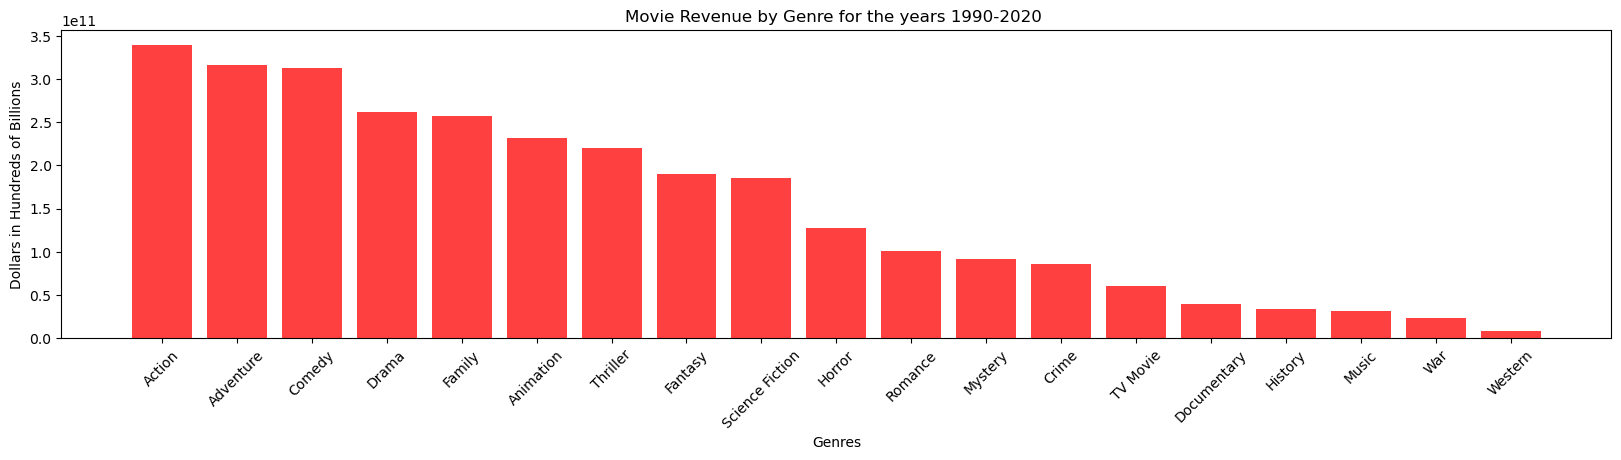

In [47]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,4))
plt.bar(x_axis, y_axis, color='r', alpha=0.75, align="edge")
plt.xticks(tick_locations, transposed_df["Genre"], rotation=45)


plt.title("Movie Revenue by Genre for the years 1990-2020 ")
plt.xlabel("Genres")
plt.ylabel("Dollars in Hundreds of Billions")

plt.show()

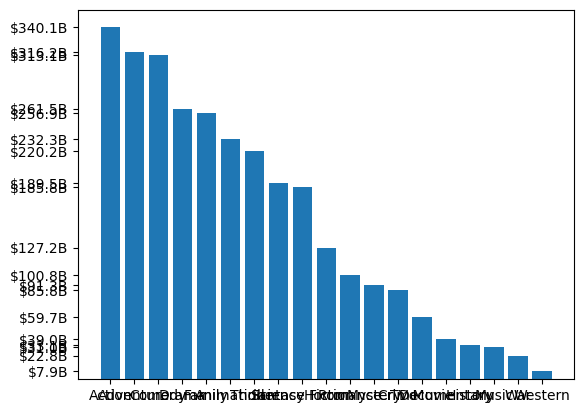

In [46]:
x_axis = transposed_df["Genre"]

y = transposed_df["Revenue"]

plt.bar(x_axis, y)


# Define the y-axis values in hundreds of billions
y_values = [val / 1e9 for val in y]
plt.yticks(y, ['${:.1f}B'.format(val) for val in y_values])

plt.show()

In [ ]:
profit_data = profit_copy[['Profit',
       'History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']]

profit_data

In [ ]:
# Define the columns to search for the value 1
columns_to_search = ['History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']

# Specify the column from which to replace the value
replacement_column = 'Profit'

# Iterate over the rows and columns to find and replace the value
for index, row in profit_data.iterrows():
    for col in columns_to_search:
        if row[col] == 1:
            profit_data.at[index, col] = row[replacement_column]
            
profit_data 

In [ ]:
# Define an empty list to hold the sums
sums = []

# Calculate the sum of each column
for col in profit_data .columns:
    col_sum = profit_data  [col].sum()
    sums.append(col_sum)

# Create a new DataFrame with the sums
profit_sums = pd.DataFrame([sums], columns=profit_data  .columns)

# Display the new DataFrame with the sums
profit_sums

In [ ]:
score_data = score_copy[['Score',
       'History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']]

score_data

In [ ]:
# Define the columns to search for the value 1
columns_to_search = ['History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']

# Specify the column from which to replace the value
replacement_column = 'Score'

# Iterate over the rows and columns to find and replace the value
for index, row in score_data.iterrows():
    for col in columns_to_search:
        if row[col] == 1:
            score_data.at[index, col] = row[replacement_column]
            
score_data 

In [ ]:
# Define an empty list to hold the sums
sums = []

# Calculate the sum of each column
for col in score_data .columns:
    col_sum = score_data  [col].sum()
    sums.append(col_sum)

# Create a new DataFrame with the sums
score_sums = pd.DataFrame([sums], columns=score_data  .columns)

# Display the new DataFrame with the sums
score_sums